### 🚀 Introduction

This project focuses on building a churn prediction model for a financial institution. Customer churn is a critical issue for businesses, as retaining existing customers is often more cost-effective than acquiring new ones. By identifying customers at high risk of churning, institutions can implement targeted retention strategies.

This Jupyter Notebook that covers the entire machine learning pipeline, from data acquisition and exploratory data analysis to data preprocessing, feature engineering, model building, and evaluation, strictly using the sklearn library.

### About Dataset

#### Abstract

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Information
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

**Bank client data:**

1 - `age` (numeric)
    
2 - `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
    
3 - `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

7 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**


8 - `contact`: contact communication type (categorical: 'cellular','telephone')

9 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - `previous`: number of contacts performed before this campaign and for this client (numeric)

15 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and Economic context attributes**

16 - `emp.var.rate`: employment variation rate - quarterly indicator (numeric)


17 - `cons.price.idx`: consumer price index - monthly indicator (numeric)


18 - `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)


19 - `euribor3m`: euribor 3 month rate - daily indicator (numeric)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Import classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2. Exploratory Data Analysis (EDA)

The EDA phase is crucial for understanding our data.
I will begin by examining the dataset's basic information: 📈

- `Check for missing values and data types using df.info().` 



- `Visualize the distribution of numerical features using histograms or box plots.` This can help identify outliers and understand the spread of the data.



- `Analyze the distribution of categorical features using count plots.` Pay special attention to the target variable (y in this dataset), as churn datasets are often imbalanced.




- `Examine the relationship between features and the target variable.` You can use bar plots to see how the churn rate varies across different categories (e.g., job, marital status) and box plots to see how numerical features (e.g., age, duration) relate to churn.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

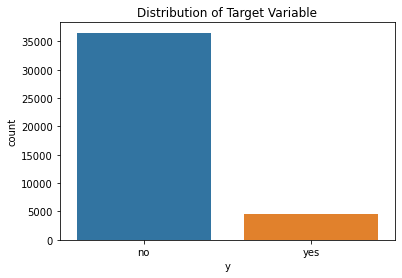

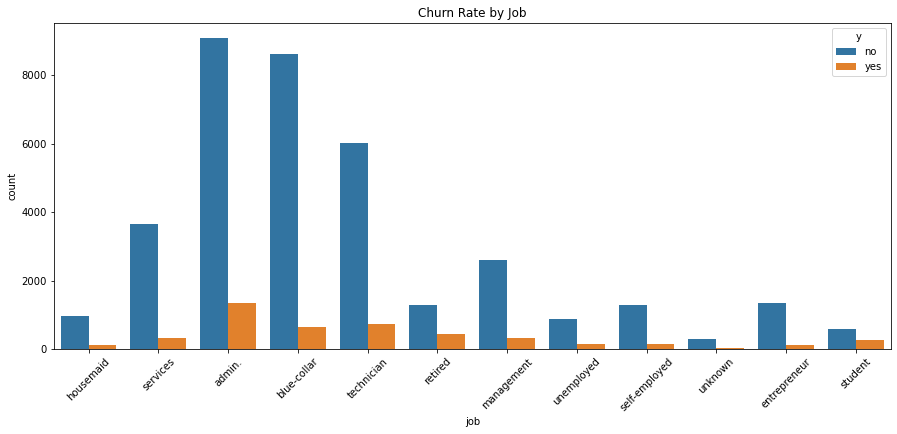

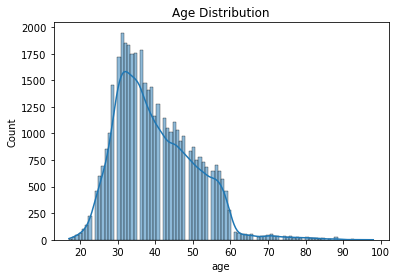

In [2]:
# Check for missing values and data types
df.info()

# Visualize the distribution of the target variable 'y'
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize churn rate by 'job'
plt.figure(figsize=(15, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Churn Rate by Job')
plt.xticks(rotation=45)
plt.show()

# Visualize numerical features
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### 3. Data Cleaning and Feature Engineering

This is where you prepare the data for the model.

- `Handle categorical variables:` One-Hot Encoding for nominal features (like job, marital, etc.) and Label Encoding for binary categorical features (like default, housing, loan). sklearn.preprocessing offers convenient tools for this.



- `Remove unnecessary columns:` I will drop columns that are not relevant for prediction, such as unique identifiers.



- `Feature Scaling:` I will use StandardScaler to Standardize numerical features to ensure that no single feature dominates the model due to its scale.



- `Address class imbalance:` Since churn is often a minority class, the dataset is likely imbalanced. 
    This can lead to a model that is very accurate at predicting the majority class but poor at identifying churners. 
    Consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) from the `imblearn` library to oversample the minority class.

In [3]:
# Drop irrelevant features
df.drop(['duration', 'pdays'], axis=1, inplace=True) # Dropping based on domain knowledge

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify categorical and numerical features...these below will return lists of categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines objects for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# apply the preprocessing pipelines to your features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4. Model Building and Evaluation

Now, you will build and evaluate several classification models.

- `Create a pipeline:` Will use Pipeline from sklearn to combine the preprocessing steps and the model in a single object. This prevents data leakage and simplifies the workflow.

- `Train multiple classifiers:` This will train a variety of sklearn classification algorithms. We'll Start with a baseline model like Logistic Regression, then move to more complex ones such as Decision Tree Classifier, Random Forest Classifier, and Support Vector Machine (SVC).

- `Evaluate model performance:` Evaluate each model's performance on the test set using a variety of metrics. Since the dataset is imbalanced, metrics like Precision, Recall, and F1-Score are more informative than simple Accuracy. The ROC-AUC curve is also a great way to compare model performance.

In [4]:
# Models to be tested

from imblearn.pipeline import Pipeline

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(probability=True), # probability=True is needed for ROC-AUC
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    print(f"--- {name} ---")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
    print("-" * 20)

# Compare models based on a key metric, like F1-Score or ROC-AUC
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='F1-Score', ascending=False))

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.68      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238

--------------------
--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7310
           1       0.31      0.34      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238

--------------------
--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.57      0.29      0.39       928


### 📊 Model Perfomance Analysis

In churn prediction, correctly identifying customers who are likely to churn (class 1, the positive class) is often more critical than overall accuracy. Therefore, recall and F1-score for class 1 are particularly important metrics to focus on.

#### 1. Logistic Regression
**Accuracy:** 0.90

- Class 0 (Non-Churn): Very high precision (0.91) and recall (0.99), leading to an excellent F1-score (0.95). It's great at identifying non-churners.

- Class 1 (Churn):

  - Precision: 0.68 (68% of customers predicted to churn actually churned).

  - Recall: 0.22 (Only 22% of actual churners were correctly identified).

  - F1-score: 0.33

Analysis: While overall accuracy is high, Logistic Regression performs poorly in identifying actual churners (low recall for class 1). This model would miss a significant number of customers who are about to churn.

#### 2. Decision Tree
**Accuracy:** 0.84

- Class 0 (Non-Churn): Good precision (0.92) and recall (0.90), with an F1-score of 0.91.

- Class 1 (Churn):

  - Precision: 0.31

  - Recall: 0.34

  - F1-score: 0.32

**Analysis:** Decision Tree has a lower overall accuracy compared to Logistic Regression. It shows slightly better recall for class 1 than Logistic Regression (0.34 vs 0.22), meaning it catches more actual churners, but its precision for class 1 is much lower, indicating more false positives.

#### 3. Random Forest
**Accuracy**: 0.89

- Class 0 (Non-Churn): Strong precision (0.91) and recall (0.97), resulting in an F1-score of 0.94.

- Class 1 (Churn):

  - Precision: 0.57

  - Recall: 0.29

  - F1-score: 0.38

**Analysis:** Random Forest provides a good balance, with high overall accuracy and better precision for class 1 (0.57) compared to Decision Tree, but its recall for churners (0.29) is still relatively low, though better than Logistic Regression. It improves the F1-score for class 1 to 0.38, making it the best so far for the churn class.

#### 4. SVC (Support Vector Classifier)
**Accuracy:** 0.90

- Class 0 (Non-Churn): Excellent precision (0.91) and recall (0.99), with an F1-score of 0.95.

- Class 1 (Churn):

  - Precision: 0.70

  - Recall: 0.24

  - F1-score: 0.36

**Analysis:** SVC achieves similar overall accuracy to Logistic Regression and the highest precision for class 1 (0.70), meaning when it predicts churn, it's quite often correct. However, its recall for class 1 (0.24) is still quite low, similar to Logistic Regression, meaning it misses most actual churners.

#### 5. Gradient Boosting
**Accuracy:** 0.90

- Class 0 (Non-Churn): High precision (0.91) and recall (0.99), leading to an F1-score of 0.95.

- Class 1 (Churn):

  - Precision: 0.68

  - Recall: 0.23

  - F1-score: 0.35

**Analysis:** Gradient Boosting performs very similarly to Logistic Regression in this scenario, with high overall accuracy but low recall for the churn class (0.23).


From this summary, Random Forest has the highest F1-score for class 1, indicating the best balance between precision and recall for churners among the models tested. SVC has the highest precision, but a relatively low recall. Decision Tree has the highest recall, but its precision is quite poor, meaning many of its churn predictions would be false alarms.



### 🎯 Recommendations 
**1. Prioritize Random Forest for initial deployment:** Given its superior F1-score for the churn class (0.38), Random Forest appears to be the most balanced performer for identifying churners effectively in your current setup.

**2. Focus on improving Recall for Class 1:** All models still have relatively low recall for churners (the highest is 0.34 from Decision Tree). This means a large percentage of actual churners are being missed. For a financial institution, missing churners can be costly.

- **Consider techniques for imbalanced data:** If you haven't already, strongly consider using SMOTE (Synthetic Minority Over-sampling Technique) or other over/under-sampling methods from imblearn on your training data. This can significantly boost recall for the minority class.


- **Adjust class weights:** Many sklearn classifiers allow you to adjust class_weight parameters to give more importance to the minority class during training.


- **Optimize for Recall during hyperparameter tuning:** When performing hyperparameter tuning (e.g., with GridSearchCV or RandomizedSearchCV), set scoring='recall' or scoring='f1' (if you want to balance precision and recall) for the churn class.

**3. Explore Threshold Tuning:** You can adjust the decision threshold for your models. By default, most models classify based on a 0.5 probability. Lowering this threshold might increase recall (catching more churners) at the cost of precision (more false positives), which might be acceptable depending on the business cost of missing a churner versus a false positive.

**4. Feature Importance:** For the best performing model I will inspect feature importances (model.feature_importances_) to understand which features are most influential in predicting churn. This can provide actionable business insights.


### Hyperparameter Tuning and Improving The Models Performance

Using the above recommendations I will continue to train Random Forest and Decision Trees as they have better performance metrics for our churn problem at hand. I will adjust these models individually to improve their perfomance by exploring the following ways listed below

- Consider the techniques for imbalanced dataset and in this case SMOTE
- Perform hyperparameter tuning using GridSearchCV
- Analyse feature importance and use all the features that are informative for developing the prediction model
- Lastly I will take the better performing model in preparation for deployment.

In [7]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('bank-additional-full.csv', sep=';')

df.drop(['duration', 'pdays'], axis=1, inplace=True) # Dropping based on domain knowledge

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [4]:

# --- 1. Data Preparation -----------------------------------------------------------------------------------


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify categorical and numerical features...these below will return lists of categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines objects for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# apply the preprocessing pipelines to your features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])




In [5]:
# --- 2. Hyperparameter Tuning with GridSearchCV using Pipelines ---------------------------------------------

print("--- Starting Hyperparameter Tuning with GridSearchCV ---")
print("This may take some time. Please wait...")

# Define pipelines and their parameter grids
pipelines_and_params = {
    'Random Forest': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'params': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [5, 10, None]}},
    'Decision Tree': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {'classifier__max_depth': [5, 10, None]}}}


best_models = {}

# Use Stratified K-Fold for cross-validation to preserve class balance
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, config in pipelines_and_params.items():
    print(f"\n--- Tuning {model_name} ---")
    grid_search = GridSearchCV(
        config['pipeline'],
        config['params'],
        scoring='f1',
        cv=cv_strategy,
        n_jobs=1,
        verbose=1
    )
    # Fit the pipeline on the original training data. The pipeline handles all preprocessing internally.
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1-score for {model_name}: {grid_search.best_score_:.2f}")


--- Starting Hyperparameter Tuning with GridSearchCV ---
This may take some time. Please wait...

--- Tuning Random Forest ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best F1-score for Random Forest: 0.49

--- Tuning Decision Tree ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Decision Tree: {'classifier__max_depth': 5}
Best F1-score for Decision Tree: 0.47



--- Plotting ROC Curve ---


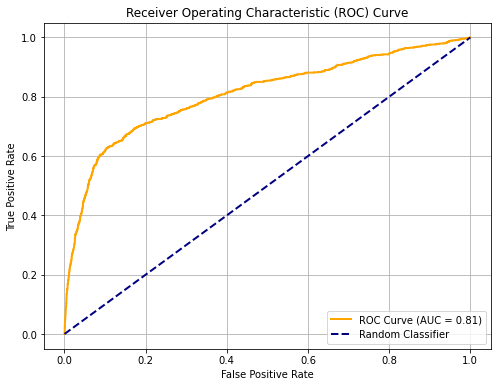

In [6]:
# --- 4. Plotting ROC Curve for the best performing model ----------------------------------------------------------------------------------

# Based on the analysis above the best performing model in this is the Random Forest

print("\n--- Plotting ROC Curve ---")
# Get probabilities from the best performing model (e.g., Random Forest)


best_rf_model = best_models['Random Forest']
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_rf)

roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")
plt.grid(True)

plt.show()



--- Analyzing Feature Importance ---

Top 10 most important features for best Random Forest Model:
Fitted with parameters:{'classifier__max_depth': 10, 'classifier__n_estimators': 200} 


                   Feature  Importance
6           num__euribor3m    0.147629
7         num__nr.employed    0.114004
3        num__emp.var.rate    0.080424
60   cat__poutcome_success    0.052624
1            num__campaign    0.050679
42  cat__contact_telephone    0.045247
5       num__cons.conf.idx    0.044407
4      num__cons.price.idx    0.041324
41   cat__contact_cellular    0.034546
33    cat__default_unknown    0.027664


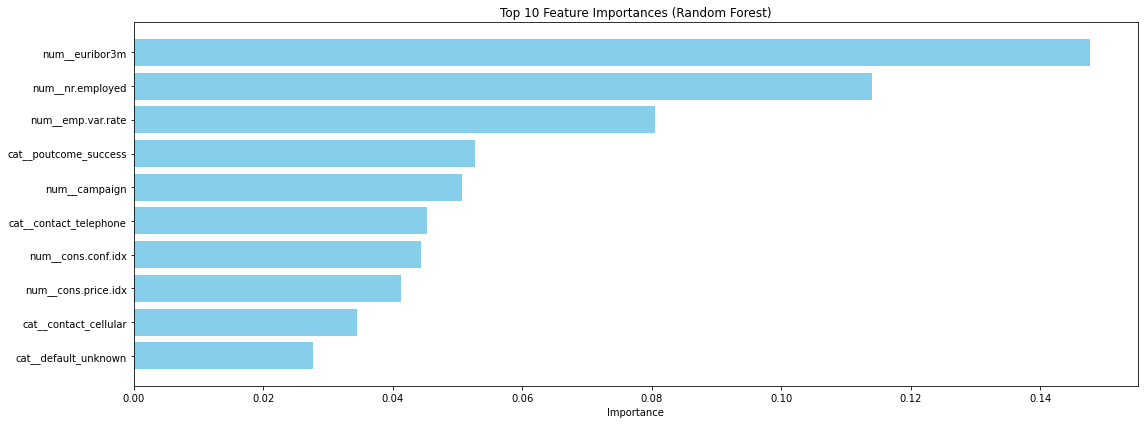

In [10]:
# --- 5. Feature Importance Analysis for the Best Performing Model --------------------------------------------------------------------------------

print("\n--- Analyzing Feature Importance ---")
# Note: Feature importance is not directly available for all models (e.g., SVC with non-linear kernels)

# Random Forest Feature Importance
best_rf_pipeline = best_models['Random Forest']

# Get feature names directly from the fitted preprocessor
final_feature_names_rf = best_rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
rf_importances = best_rf_pipeline.named_steps['classifier'].feature_importances_

rf_feature_importance_df = pd.DataFrame({'Feature': final_feature_names_rf,
                                        'Importance': rf_importances}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features for best Random Forest Model:")
print("Fitted with parameters:{'classifier__max_depth': 10, 'classifier__n_estimators': 200} ")
print("\n")
print(rf_feature_importance_df.head(10))

# Plotting Feature Importance
fig, axes = plt.subplots(1, 1, figsize=(16, 6))

# Plot for Random Forest
axes.barh(rf_feature_importance_df['Feature'].head(10), rf_feature_importance_df['Importance'].head(10), color='skyblue')
axes.set_xlabel('Importance')
axes.set_title('Top 10 Feature Importances (Random Forest)')
axes.invert_yaxis()


plt.tight_layout()
plt.show()

#### Analysis of Random Forest Feature Importance

The table shows which features were most influential in the Random Forest model's predictions. The higher the "Importance" score, the more that feature contributed to the model's ability to distinguish between customers who churn and those who don't.


**Financial and Employment Factors (num__euribor3m, num__nr.employed, num__emp.var.rate):** The top three most important features are all related to economic and employment conditions.


`num__euribor3m` (interest rate) is the single most important factor, suggesting that customers are highly sensitive to prevailing financial conditions.


`num__nr.employed` and `num__emp.var.rate` (employment-related rates) are also very important, indicating that a customer's employment stability and the broader job market are strong predictors of their likelihood to churn. This makes sense, as financial stability directly impacts a customer's ability or willingness to continue a service.


**Outcome of Previous Campaigns** (`cat__poutcome_success`): The fourth most important feature is a categorical one: cat__poutcome_success. This is a powerful insight. It tells you that customers who were successfully contacted in a previous marketing campaign are significantly less likely to churn. This highlights the effectiveness of your past retention efforts and suggests that a successful contact is a key signal of a retained customer.


**Communication and Interaction** (`cat__contact_cellular`, `cat__contact_telephone`): The method of contact also appears to be a significant driver.


`cat__contact_telephone` is more important than cat__contact_cellular, which could suggest that direct phone calls are a more effective channel for predicting churn or that the type of customer who has only a landline (a potential proxy for age or customer segment) behaves differently.


**Consumer Indicators** (`num__cons.conf.idx`, `num__cons.price.idx`): These features relate to broader consumer confidence and price indices. They show that overall market sentiment and economic health, beyond just employment, have a notable impact on individual customer behavior.


In summary, this analysis suggests that macroeconomic factors (interest rates, employment) are the primary drivers of churn, followed by the success of previous marketing interventions and the channel of communication. These insights are crucial for developing targeted strategies to retain customers. You can focus your efforts on segments of customers who are most vulnerable to these economic shifts.

### Deployment Script for the Best Performing Model



In [ ]:
#---- 1. Import necessary libraries for model deployment
import pandas as pd
import numpy as np
import joblib


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings('ignore')


# --- 2. Data Preparation (for training and saving the model) ---
# NOTE: This section simulates the training phase. In a real-world scenario,
# you would load your full training data here and run this script once to
# save the final production model and preprocessor.

from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('bank-additional-full.csv', sep=';')

df.drop(['duration', 'pdays'], axis=1, inplace=True) # Dropping based on domain knowledge

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify categorical and numerical features...these below will return lists of categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines objects for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# apply the preprocessing pipelines to your features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final production pipeline with the best hyperparameters
best_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

print("Training the final model with best hyperparameters...")
best_rf_pipeline.fit(X_train, y_train)
print("Training complete. Model and preprocessor are ready to be saved.")






# --- 3. Saving the Trained Model and Preprocessor ---

# This is the critical step for deployment. We save the entire pipeline,
# which includes both the preprocessor and the final model.
joblib.dump(best_rf_pipeline, 'production_model_pipeline.joblib')
print("Production model pipeline saved as 'production_model_pipeline.joblib'")





# --- 4. Production Prediction Function (for a separate deployment script) ---

# This part of the code demonstrates how you would use the saved model
# in a separate script or a web service to make real-time predictions.
def predict_churn(data: pd.DataFrame):
    """
    Loads the saved model and preprocessor to predict churn for new data.

    Args:
        data (pd.DataFrame): A DataFrame containing new customer data
                             with the same column structure as the training data.

    Returns:
        np.ndarray: An array of churn predictions (0 for no churn, 1 for churn).
    """
    try:
        # Load the saved model and preprocessor
        loaded_pipeline = joblib.load('production_model_pipeline.joblib')
        
        # Use the loaded pipeline to make predictions
        predictions = loaded_pipeline.predict(data)
        
        return predictions
    except FileNotFoundError:
        print("Error: The model file 'production_model_pipeline.joblib' was not found.")
        return None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None


    
# --- 5. Example Usage ---

# Simulate a new, unseen data point that would come from a live system

# This data must have the same column names as your original training data.

new_customer_data = pd.DataFrame([
    # Replace these values with actual new customer data
    {**{f'num_feature_{i}': np.random.rand() for i in range(18)},
     'cat_feature_A': 'Cat_A1', 'cat_feature_B': 'Cat_B2'}
])

print("\nSimulating a prediction for a new customer...")
predictions = predict_churn(new_customer_data)

if predictions is not None:
    if predictions[0] == 1:
        print("Prediction: This customer is likely to churn. (Prediction: 1)")
    else:
        print("Prediction: This customer is likely to be retained. (Prediction: 0)")
    print(f"Full predictions array: {predictions}")
